In [27]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

path = 'C:\\Users\\Jeff\\Desktop\\Pytho2\\proyecto-2b\\report\\news.pkl'

df = pd.read_pickle(path)

# Reporte de noticias de El Comercio

### Reporte elaborado en base a las noticias publicadas en Ecuavisa

## Cantidad de noticias por año

Para empezar podemos visualizar gráficamente como se ha desarrollado el comportamiento de publicación de noticias a lo largo de los años. La siguiente gráfica muestra la cantidad de artículos recopilados, organizados por año de publicación; siendo el 2015 el año en el que más se publicaron noticias.

<AxesSubplot:xlabel='Date'>

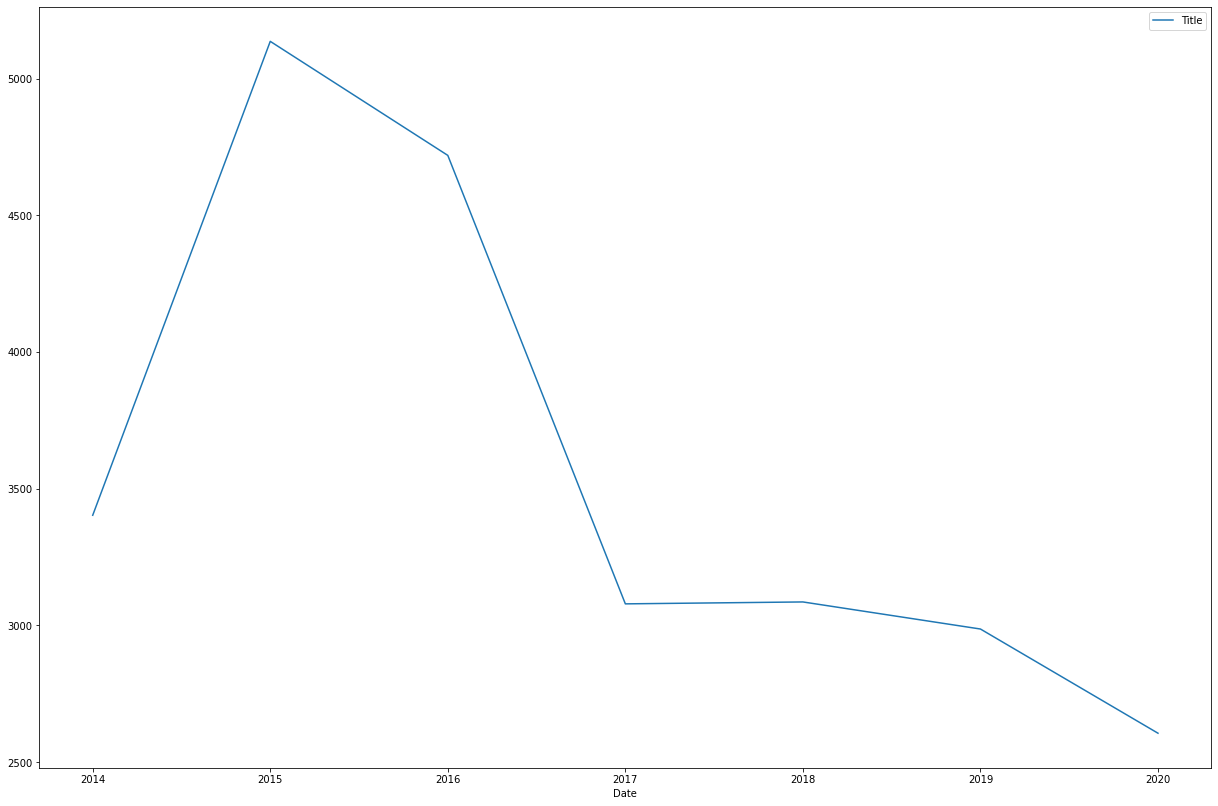

In [28]:
df_per_year = df.groupby(df.Date.str[-4:])['Title'].count()

df_per_year = df_per_year.reset_index()

df_per_year = df_per_year[df_per_year['Date'].str.isdigit()]

df_per_year.plot(kind='line', x='Date', y='Title', figsize=(21, 14))

## Noticias por mes

Ahora, aunque sería interesante analizar como va el año por mes, el 2020 aún no termina así que analizaremos el año pasado. 

<AxesSubplot:ylabel='index'>

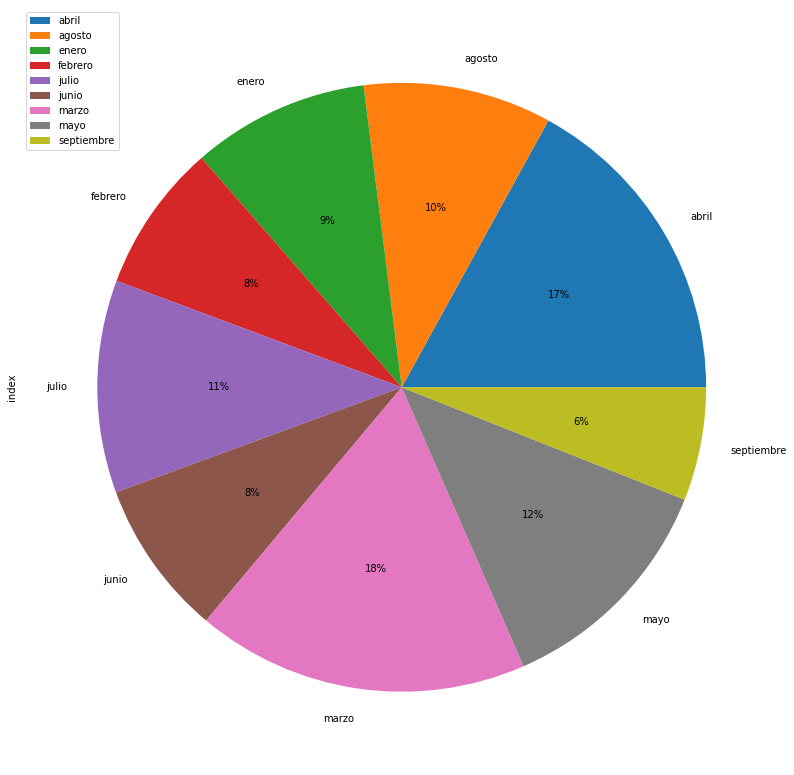

In [29]:
df_per_month_2019 = df.Date.str.split(' ').apply(lambda x: ' '.join(x[-3:]))

df_per_month_2019 = df_per_month_2019.reset_index()

df_per_month_2019 = df_per_month_2019[df_per_month_2019['Date'].str[-4:] == '2020']

df_per_month_2019 = df_per_month_2019.Date.str.split(' ').apply(lambda x: x[0])

df_per_month_2019 = df_per_month_2019.reset_index()

df_per_month_2019 = df_per_month_2019.groupby(df_per_month_2019.Date)['index'].count()

df_per_month_2019 = df_per_month_2019.reset_index()

df_per_month_2019 = df_per_month_2019[df_per_month_2019.Date != 'de']

df_per_month_2019 = df_per_month_2019.set_index('Date')

df_per_month_2019.plot.pie(y='index', figsize=(14, 14), autopct='%1.0f%%')

## La hora de la noticia

A lo largo de estos años, la siguiente gráfica muestra la hora favorita de los editores del comercio para publicar noticias. Descartando las 00:05 que es por mucho la hora en la que más noticias se publica.

<AxesSubplot:xlabel='Hour'>

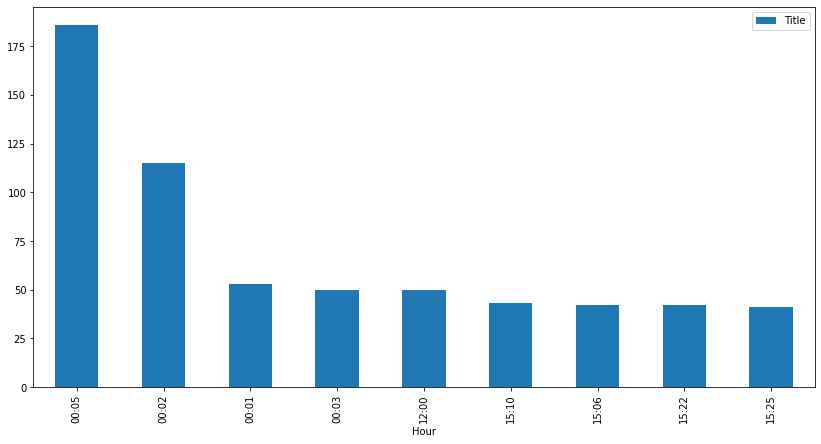

In [30]:
df_per_hour = df.groupby(df.Hour)['Title'].count()

df_per_hour = df_per_hour.reset_index().sort_values('Title', ascending=False).head(10)

df_per_hour[1:].plot(kind='bar', x='Hour', y='Title', figsize=(14, 7))

<AxesSubplot:ylabel='Title'>

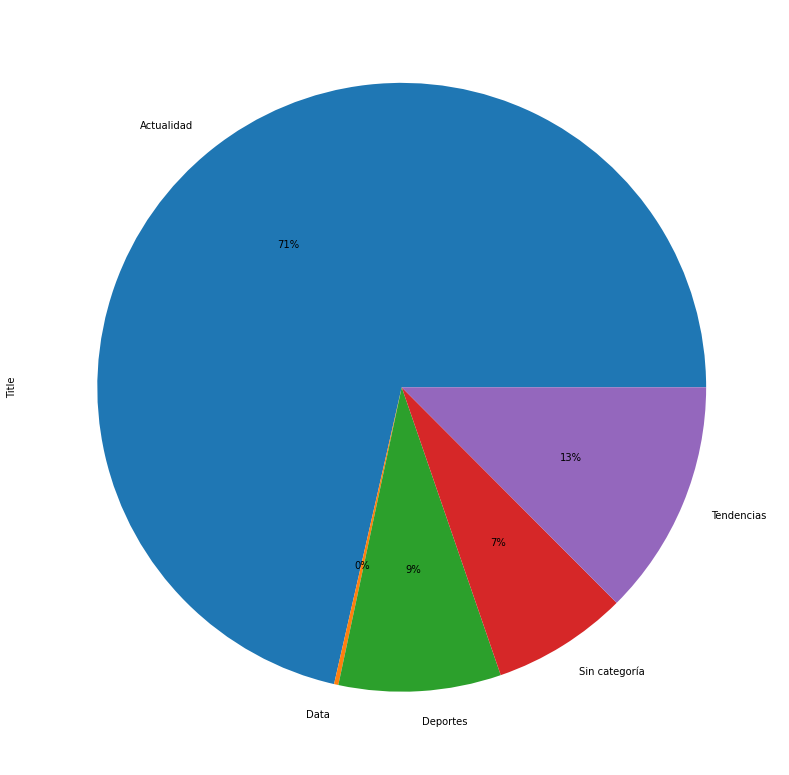

In [31]:
df_per_categories = df.groupby(df.Category)['Title'].count()

df_per_categories.plot.pie(y='Title', figsize=(14, 14), autopct='%1.0f%%')

## Organización de noticias por Tags

Pero además de las categorías, en Ecuavisa las noticias se organizan por tags, el análisis de hecho se hizo de noticias con el tag Ecuador, pero se recopiló el tag central de cada noticia tambien.

<AxesSubplot:ylabel='Tag'>

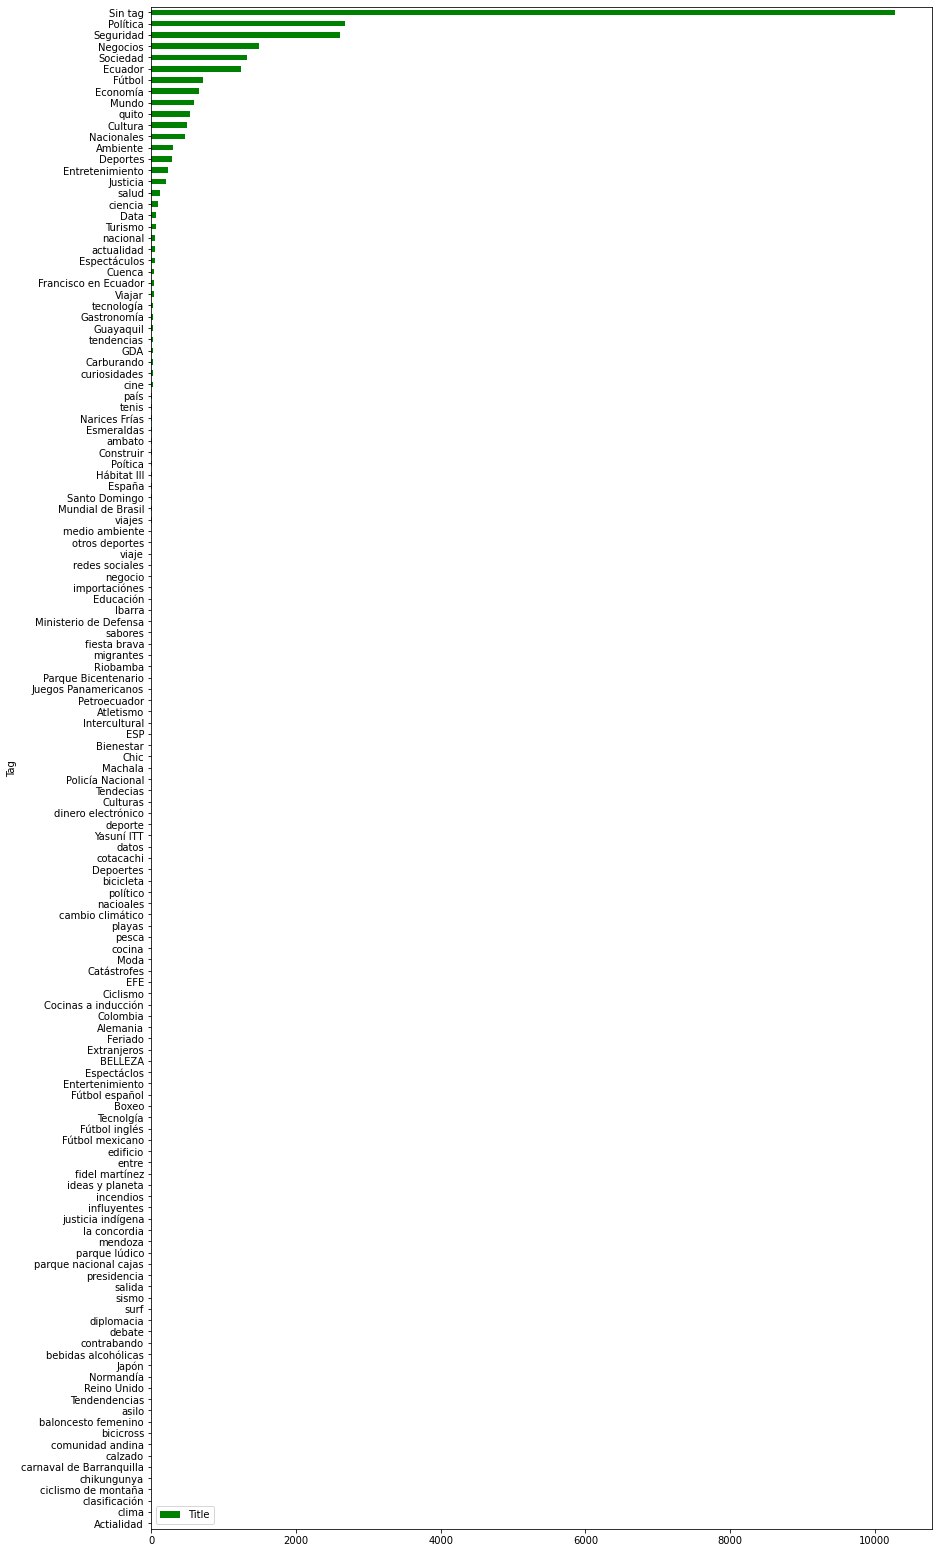

In [32]:
df_per_tag = df.groupby(df.Tag)['Title'].count()

df_per_tag = df_per_tag.reset_index().sort_values('Title')

df_per_tag.plot(kind='barh', x='Tag', y='Title', figsize=(14, 28), color='green')

## Tags en la categoría Actualidad

<AxesSubplot:ylabel='Tag'>

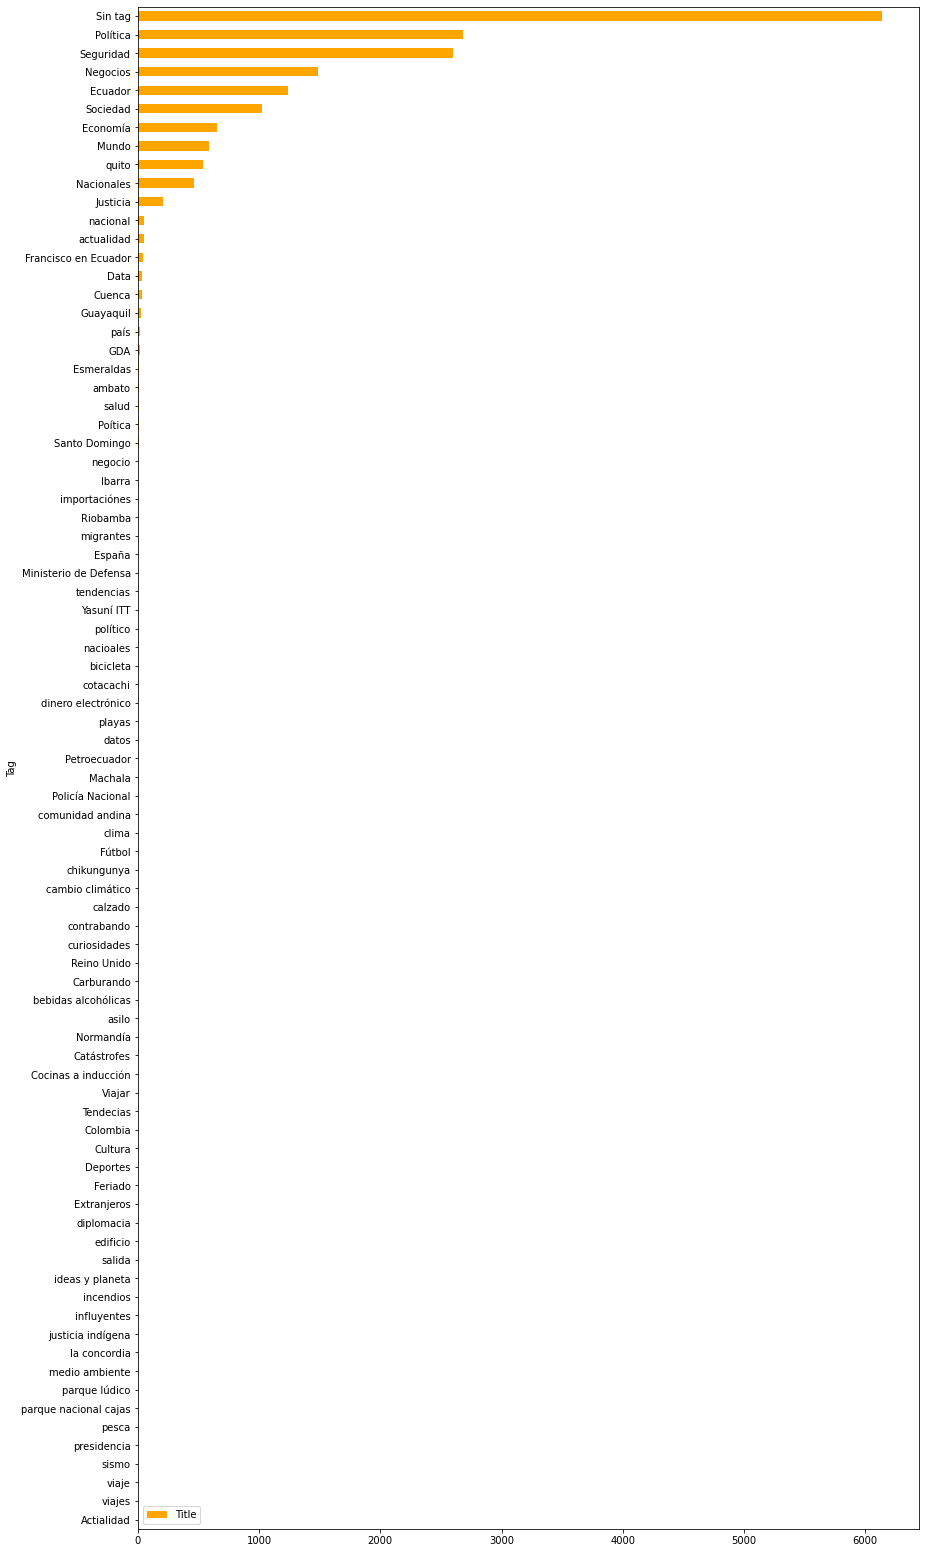

In [33]:
df_tag_per_category = df.groupby(['Category','Tag'])['Title'].count()

df_tag_per_category = df_tag_per_category.reset_index().sort_values('Title')

df_tag_per_category = df_tag_per_category[df_tag_per_category.Category == 'Actualidad']

df_tag_per_category[df_tag_per_category.Title > 0].plot(kind='barh', x='Tag', y='Title', color='orange', figsize=(14, 28))

## Tags en la categoría Tendencias

<AxesSubplot:ylabel='Tag'>

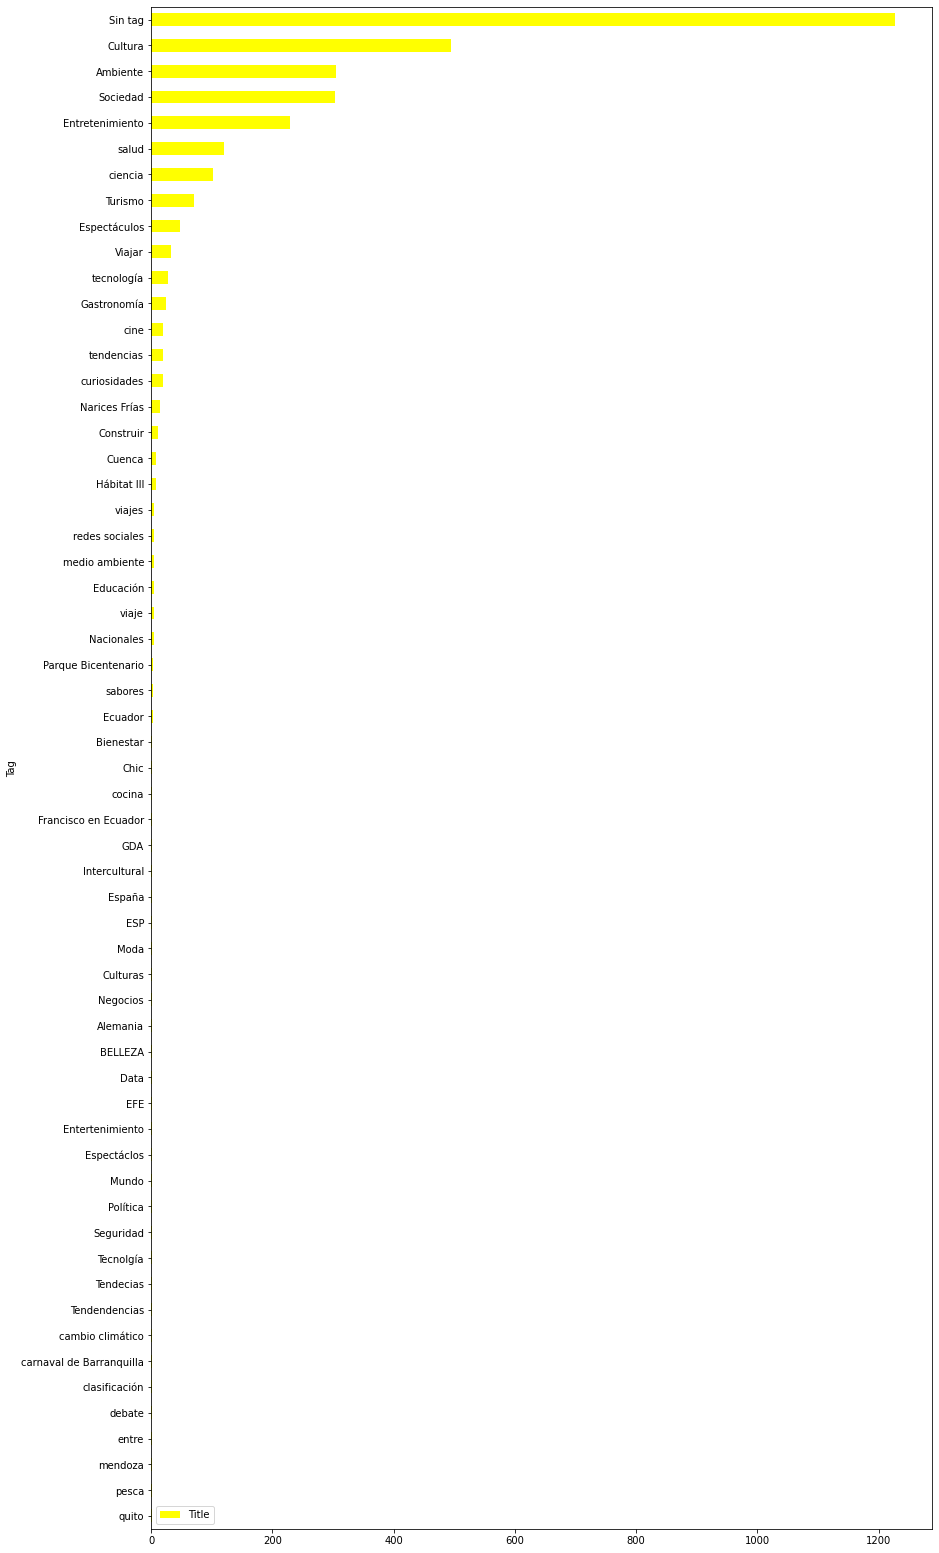

In [34]:
df_tag_per_category = df.groupby(['Category','Tag'])['Title'].count()

df_tag_per_category = df_tag_per_category.reset_index().sort_values('Title')

df_tag_per_category = df_tag_per_category[df_tag_per_category.Category == 'Tendencias']

df_tag_per_category[df_tag_per_category.Title > 0].plot(kind='barh', x='Tag', y='Title', color='yellow', figsize=(14, 28))

## Tags en la categoría Deportes

<AxesSubplot:ylabel='Tag'>

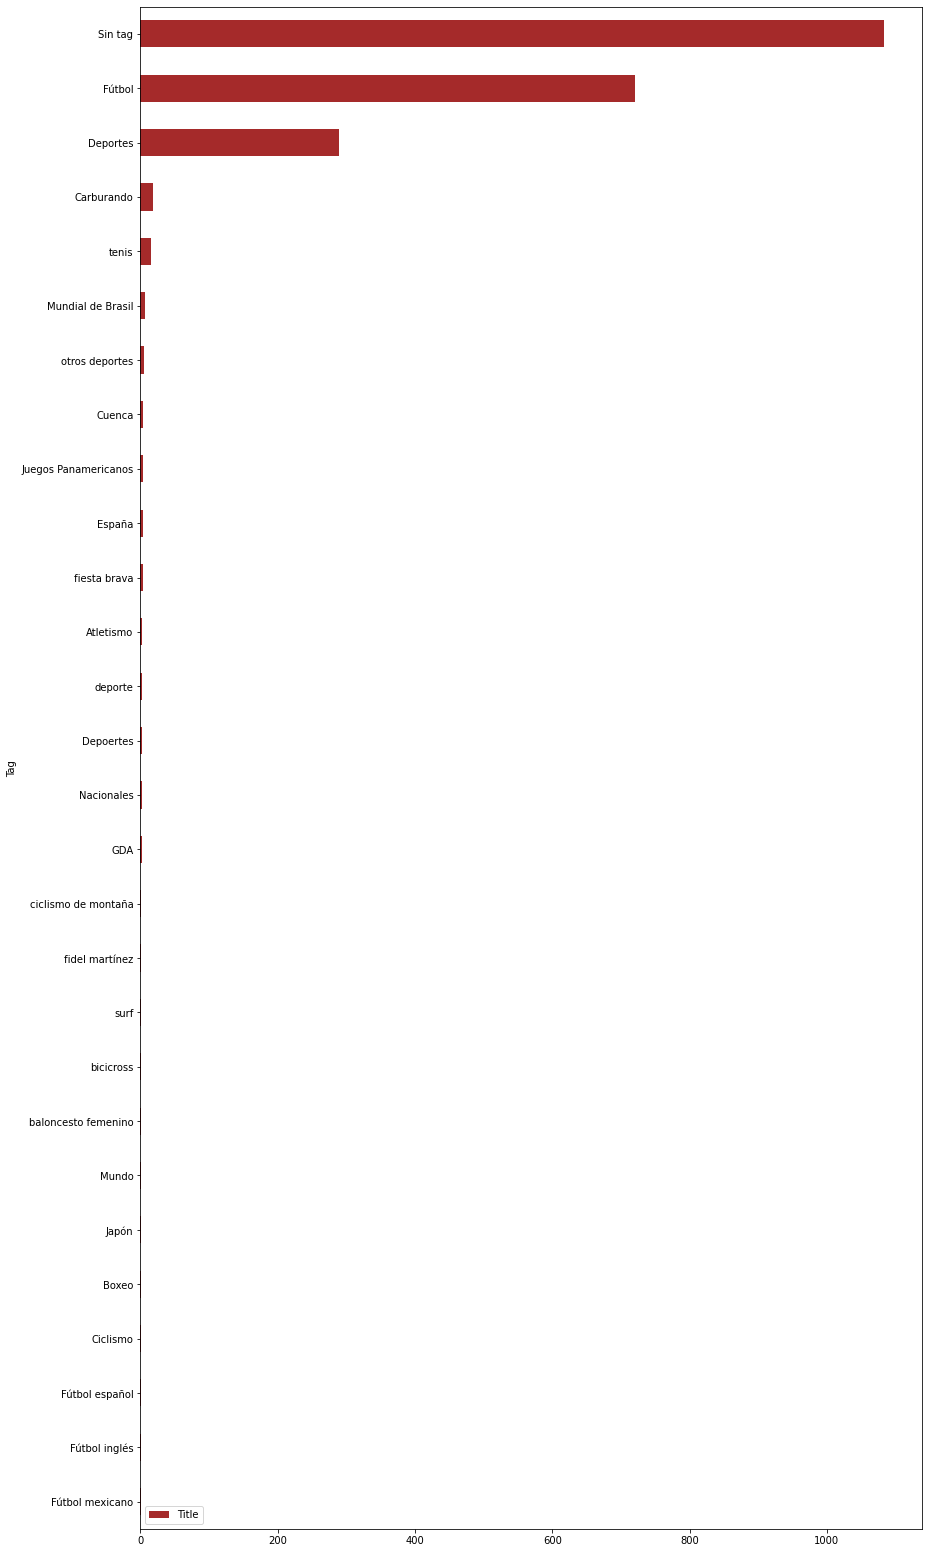

In [35]:
df_tag_per_category = df.groupby(['Category','Tag'])['Title'].count()

df_tag_per_category = df_tag_per_category.reset_index().sort_values('Title')

df_tag_per_category = df_tag_per_category[df_tag_per_category.Category == 'Deportes']

df_tag_per_category.plot(kind='barh', x='Tag', y='Title', color='brown', figsize=(14, 28))

## Empecemos a hablar de vistas

Sí, la redacción y publicación de noticias es importante, pero cuál es el impacto de esto? comparemos la cantidad de noticias publicadas y leídas por año. Estando las vistas representadas como miles de views.

<AxesSubplot:xlabel='Date'>

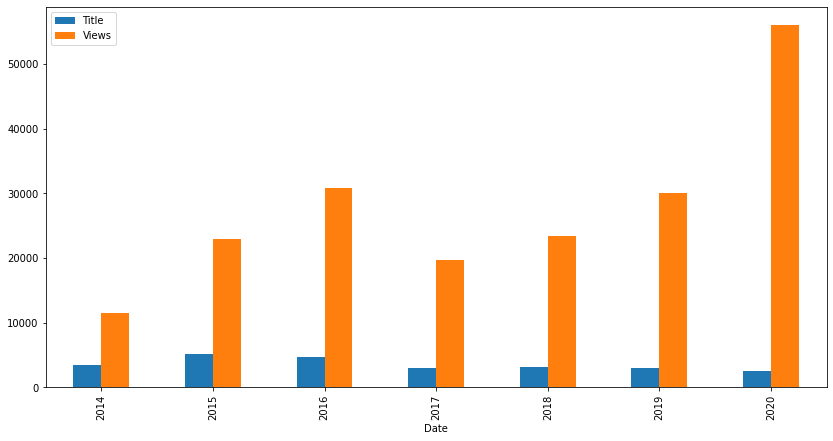

In [36]:
df_views_per_year = df.groupby(df.Date.str[-4:])['Views'].sum()

df_views_per_year = df_views_per_year.reset_index()

df_views_per_year = df_views_per_year[df_views_per_year['Date'].str.isdigit()]

df_per_year['Views'] = df_views_per_year['Views'].astype(float) / 1000

df_per_year.plot(kind='bar', x='Date', y=['Title','Views'], figsize=(14, 7))

## La categoría que más atrae a los usuarios

Actualidad reafirma su dominio, aunque quizás sea por la gran cantidad de noticias que se publican en la misma

<AxesSubplot:ylabel='Views'>

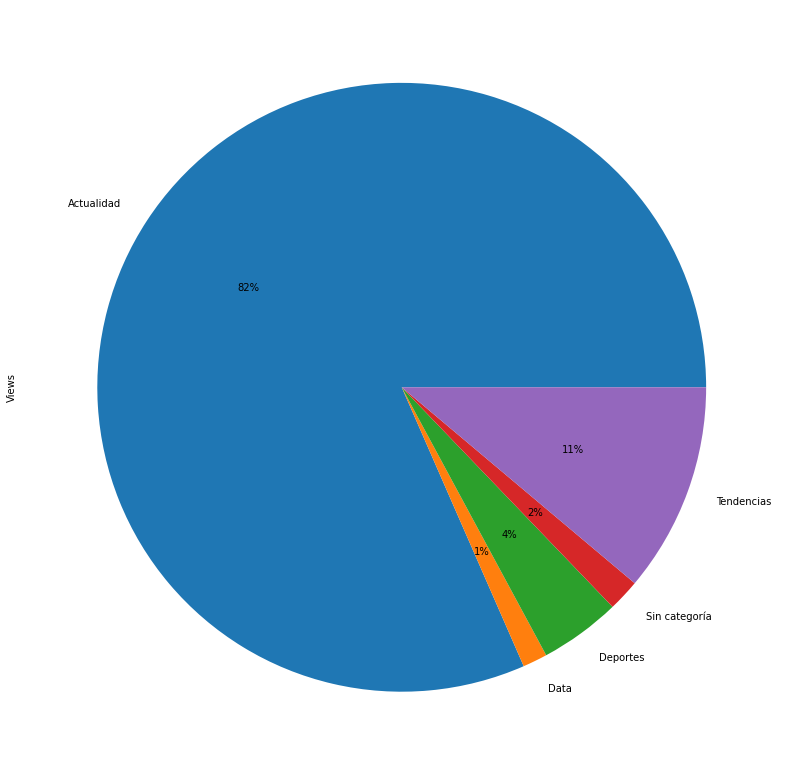

In [38]:
df_views_per_category = df.groupby(df.Category)['Views'].sum()

df_views_per_category.plot.pie(y='Views', figsize=(14, 14), autopct='%1.0f%%')

<AxesSubplot:xlabel='Category'>

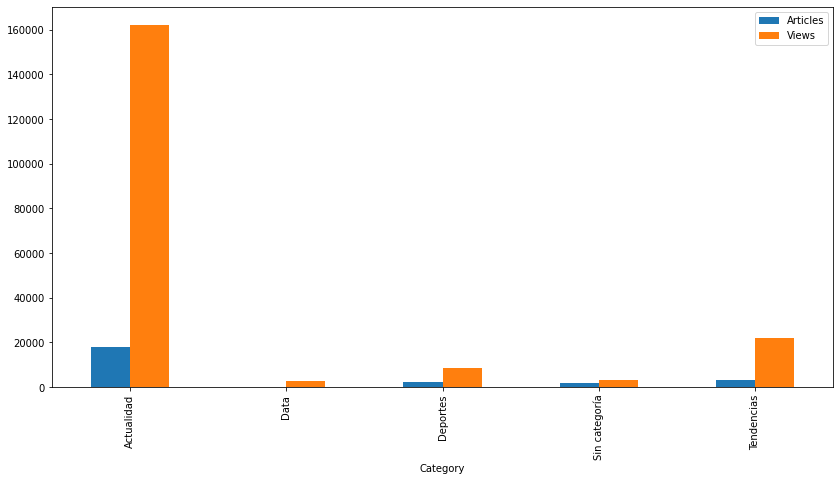

In [40]:
df_views_per_category = df.groupby(df.Category)['Views'].sum()

df_views_per_category = df_views_per_category.reset_index()

df_views_per_category['Articles'] = df_per_categories.reset_index()['Title']

df_views_per_category['Views'] = df_views_per_category['Views'].apply(lambda x: float(x) / 1000)

df_views_per_category.plot(kind='bar', x='Category', y=['Articles','Views'], figsize=(14, 7))

## Las noticias más leídas

Solo como dato, las noticias con mayor acogida de parte de los usuarios

<AxesSubplot:ylabel='Title'>

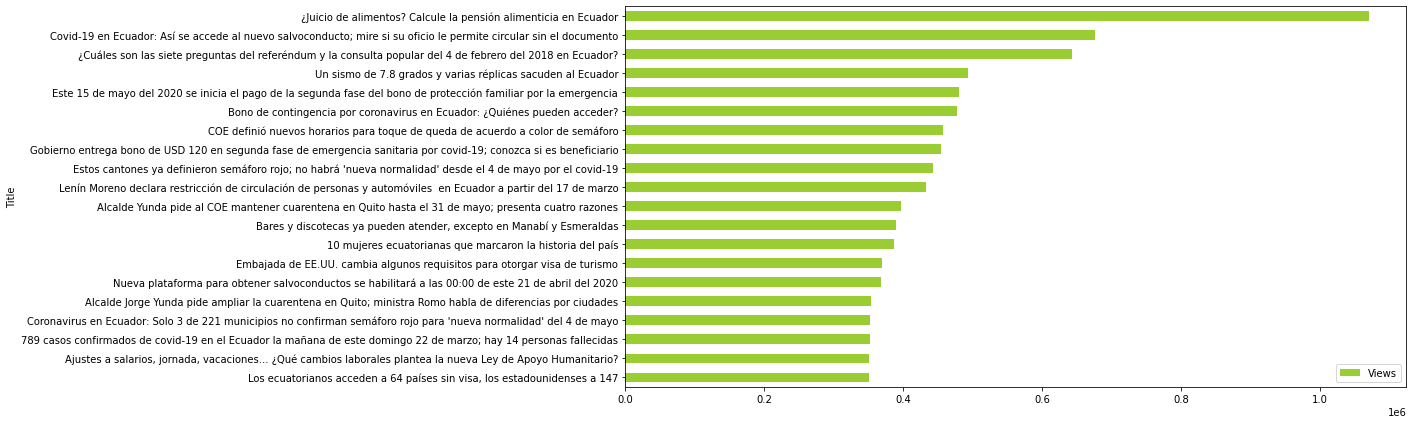

In [41]:
df_top_views = df.sort_values('Views').tail(20)

df_top_views.plot(kind='barh', x='Title', y='Views', color='YellowGreen', figsize=(14, 7))

## Otra forma de medir la acogida de los lectores

El Comercio también implementa un sistema de reacciones en la que el usuario puede seleccionar que opina de cada noticia, reacción que puede ser: Indignado, Triste, Indiferente, Sorprendido, Contento

<AxesSubplot:xlabel='Date'>

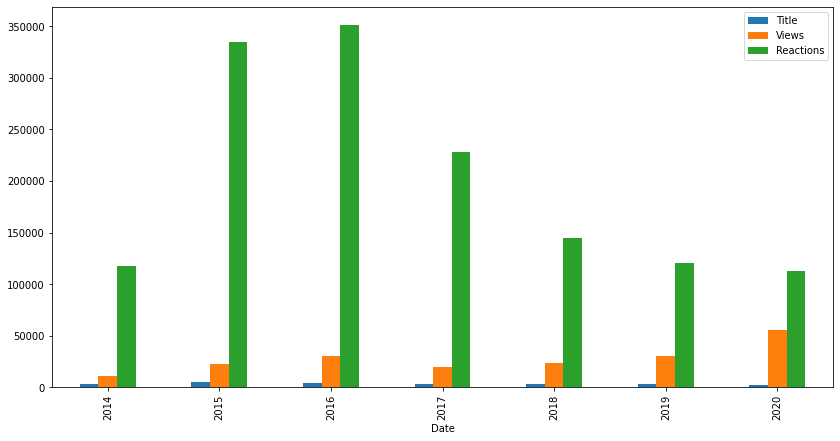

In [42]:
df_reactions_per_year = df.groupby(df.Date.str[-4:])['Total_Reactions'].sum()

df_reactions_per_year = df_reactions_per_year.reset_index()

df_reactions_per_year = df_reactions_per_year[df_reactions_per_year['Date'].str.isdigit()]

df_per_year['Reactions'] = df_reactions_per_year['Total_Reactions']

df_per_year.plot(kind='bar', x='Date', y=['Title','Views', 'Reactions'], figsize=(14, 7))

Pero este gráfico puede ser engañoso porque para poder comparar con el número de artículo, las vistas estan siendo contadas con miles de vistas, si contamos solo vistas y reacciones:

<AxesSubplot:xlabel='Date'>

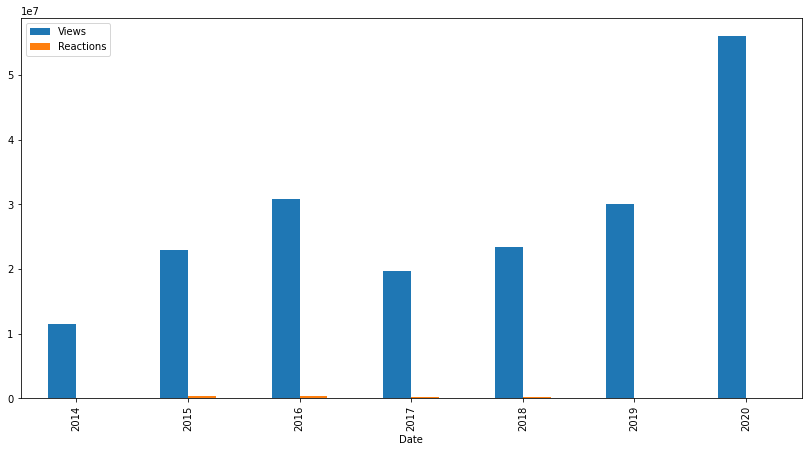

In [43]:
df_per_year['Views'] = df_per_year['Views'] * 1000

df_per_year.plot(kind='bar', x='Date', y=['Views', 'Reactions'], figsize=(14, 7))

En realidad muy pocas de las personas que ven una noticia reaccionan a ella, por ello se decidio calcular un ratio reacciones/vistas que se presentará a continuación:

<AxesSubplot:xlabel='Date'>

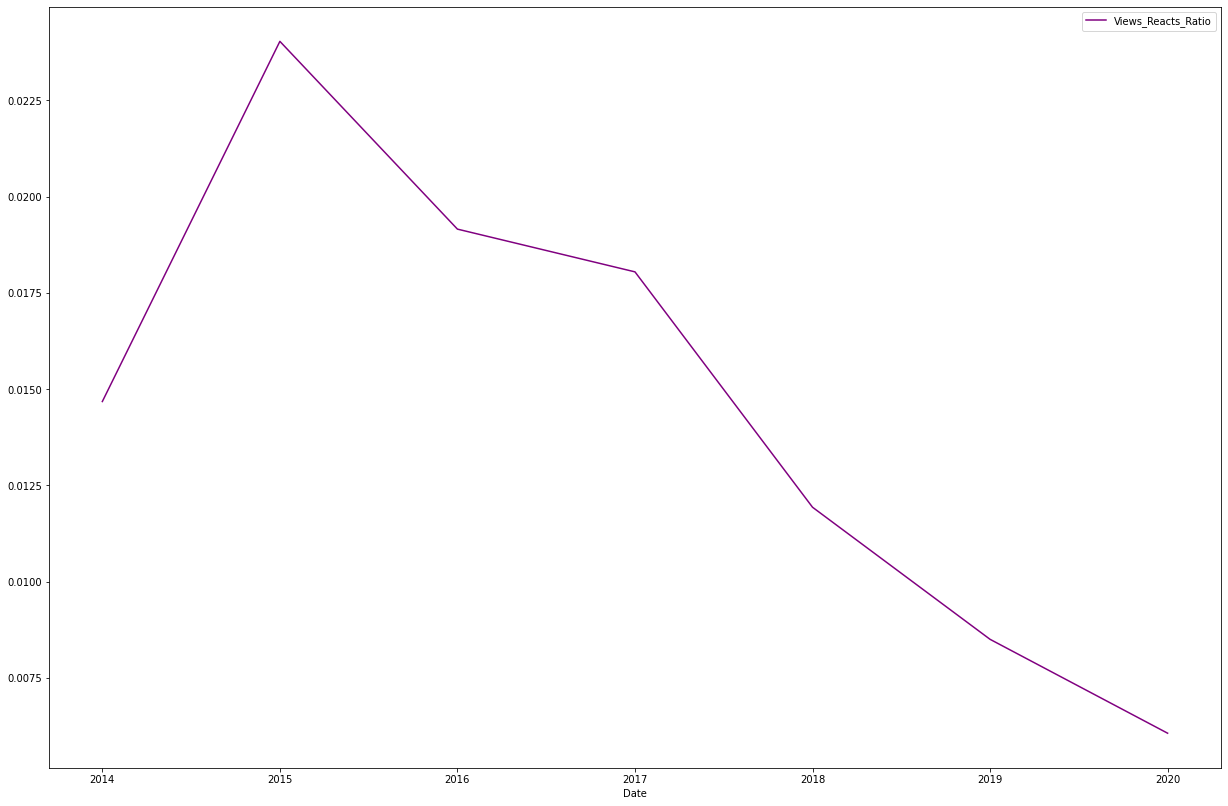

In [44]:
df_ratio = df.groupby(df.Date.str[-4:])['Views_Reacts_Ratio'].mean()

df_ratio = df_ratio.reset_index()

df_ratio = df_ratio[df_ratio['Date'].str.isdigit()]

df_ratio.plot(kind='line', x='Date', y='Views_Reacts_Ratio', color='Purple', figsize=(21, 14))

Una gráfica que muestra lo poco que la gente usa esta característica, porque en promedio, y en el mejor de los años, ni el 2% de las personas que ven una noticia reacciona a ella. ¿Debería incentivarse esto o prescindir de esta característica?

## Un mundo de reacciones

Aún así es curioso ver que opina la poca gente que reacciona

## Unos lectores indignados

<AxesSubplot:ylabel='None'>

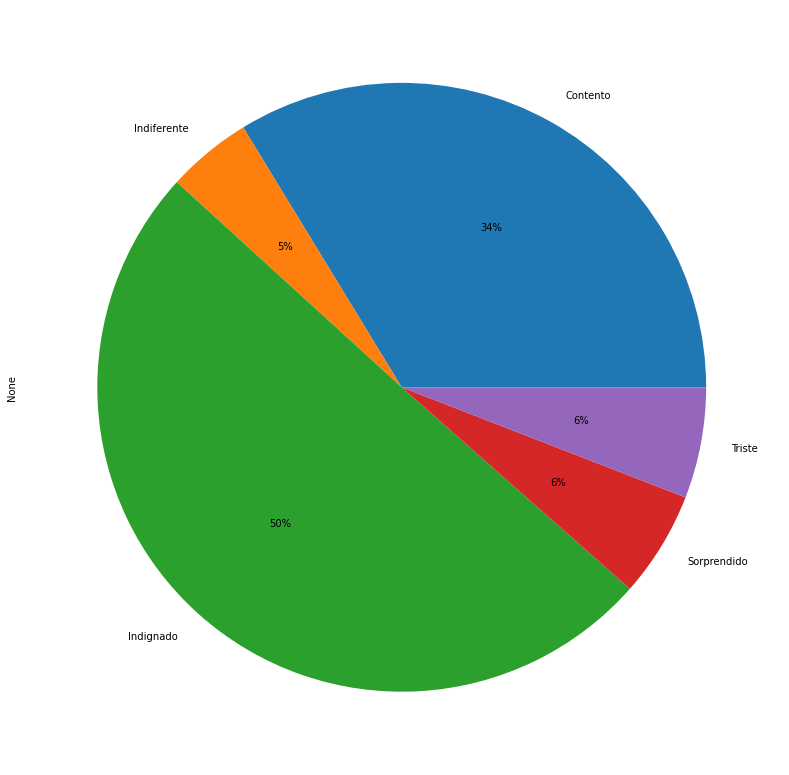

In [45]:
df_all_reactions = df.sum(numeric_only=True)

df_all_reactions = df_all_reactions[['Contento', 'Indiferente', 'Indignado','Sorprendido','Triste']]

df_all_reactions.plot.pie(y=0, figsize=(14, 14), autopct='%1.0f%%')

## Las noticias mas reaccionadas

<AxesSubplot:ylabel='Title'>

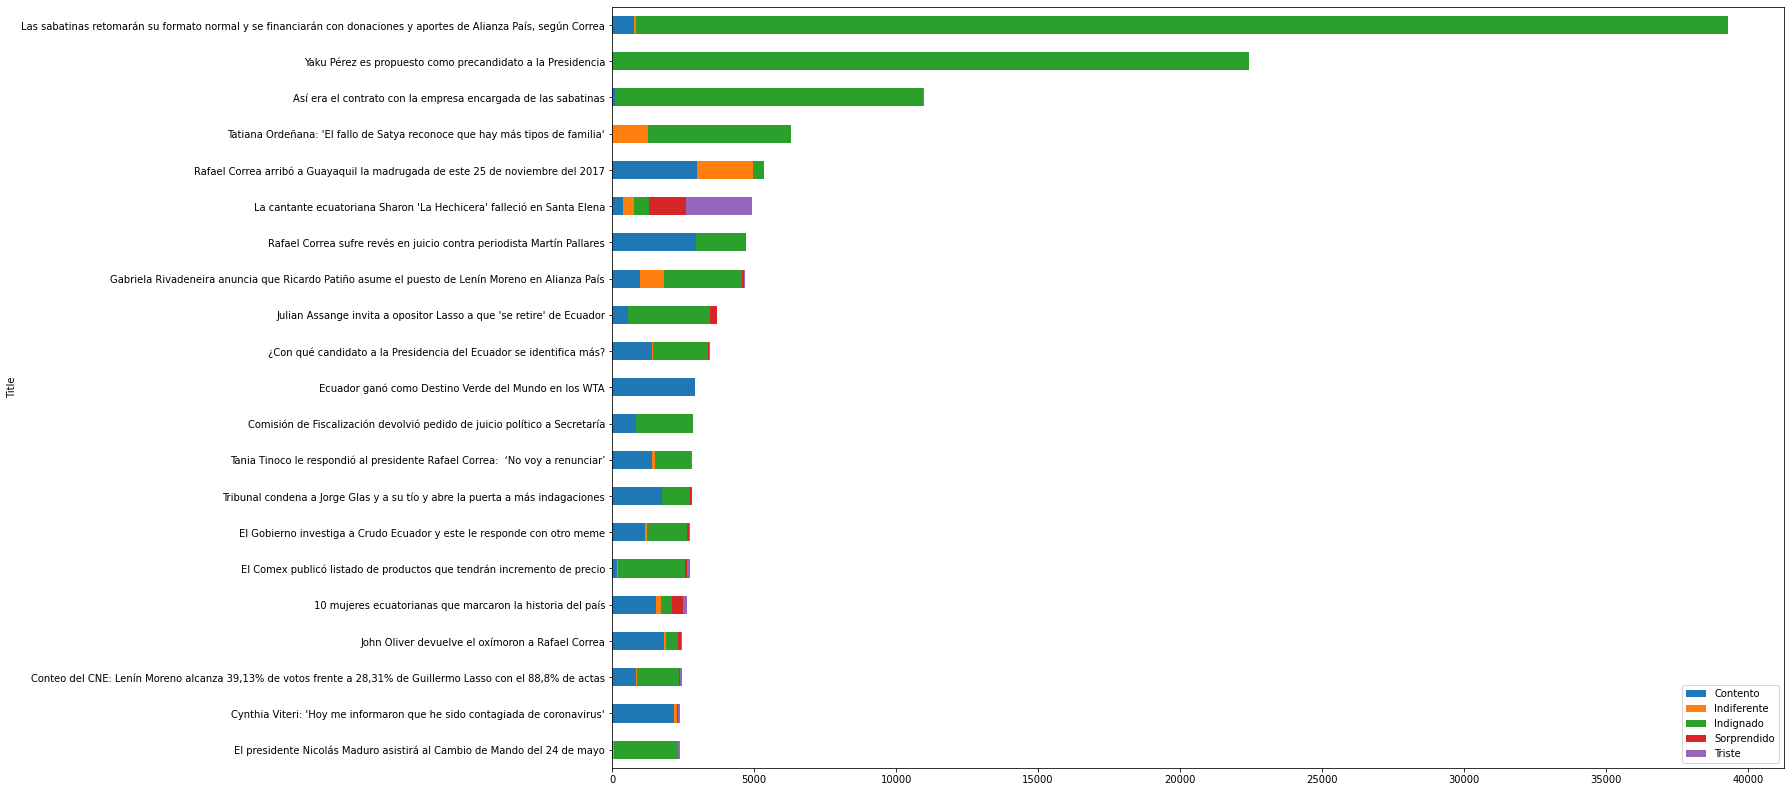

In [48]:
df_top_reactions = df.sort_values('Total_Reactions').tail(21)

df_top_reactions = df_top_reactions[['Title','Contento', 'Indiferente', 'Indignado','Sorprendido','Triste']]

df_top_reactions.plot(x='Title', kind='barh', stacked=True, figsize=(21, 14))

## Top de noticias con reacciones Contento

<AxesSubplot:ylabel='Title'>

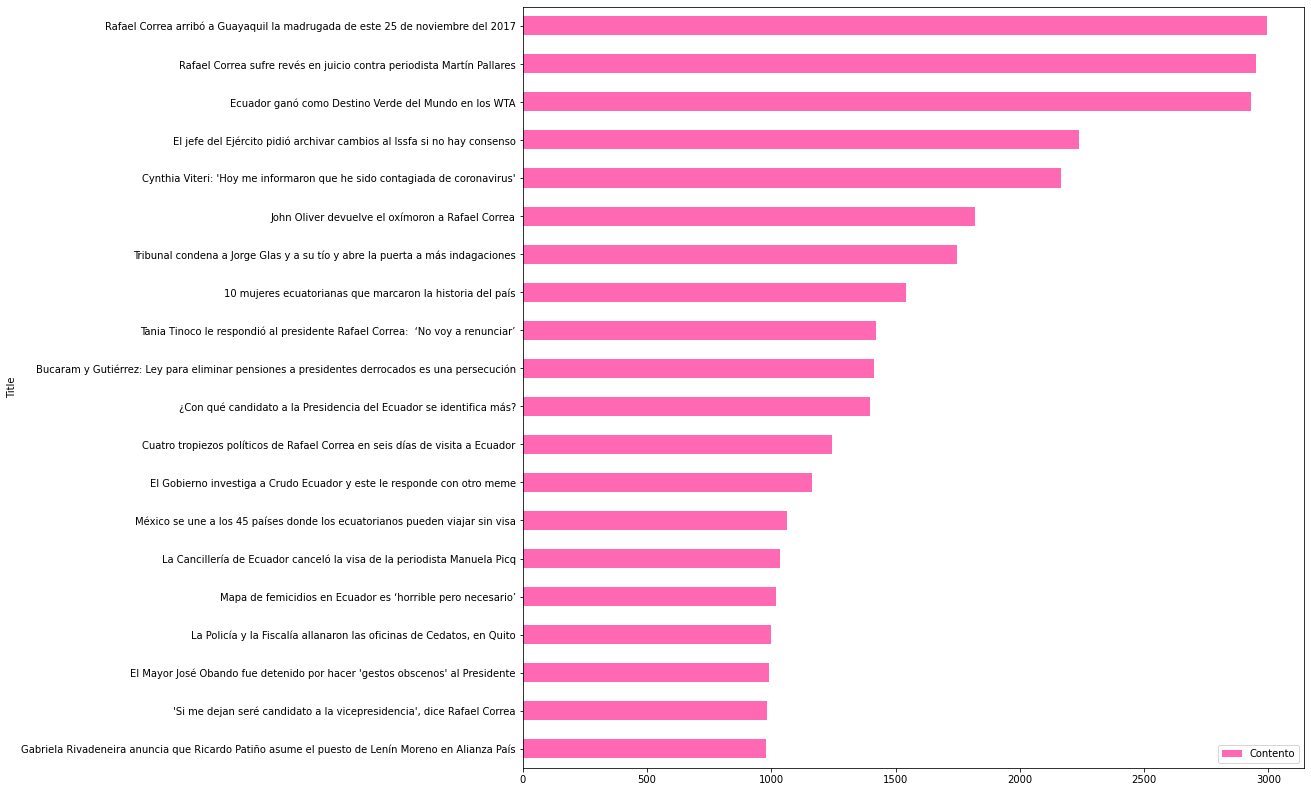

In [49]:
df_top_contento = df.sort_values('Contento').tail(20)

df_top_contento = df_top_contento[['Title','Contento']]

df_top_contento.plot(kind='barh', x='Title', y='Contento', color='HotPink', figsize=(14, 14))

## Top de noticias con reacciones Sorprendido

<AxesSubplot:ylabel='Title'>

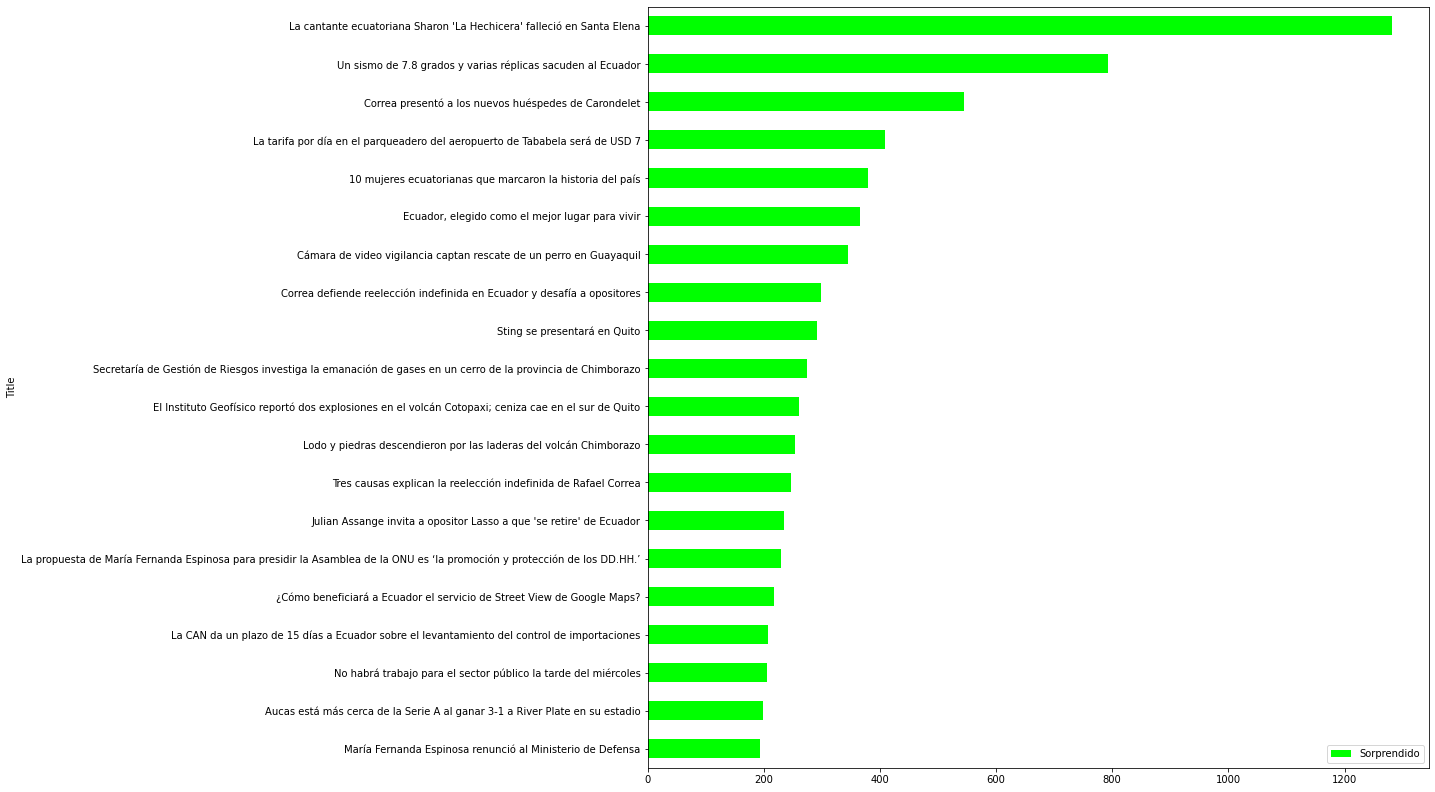

In [50]:

df_top_contento = df.sort_values('Sorprendido').tail(20)

df_top_contento = df_top_contento[['Title','Sorprendido']]

df_top_contento.plot(kind='barh', x='Title', y='Sorprendido', color='Lime', figsize=(14, 14))

## Top de noticias con reacciones Indiferente

<AxesSubplot:ylabel='Title'>

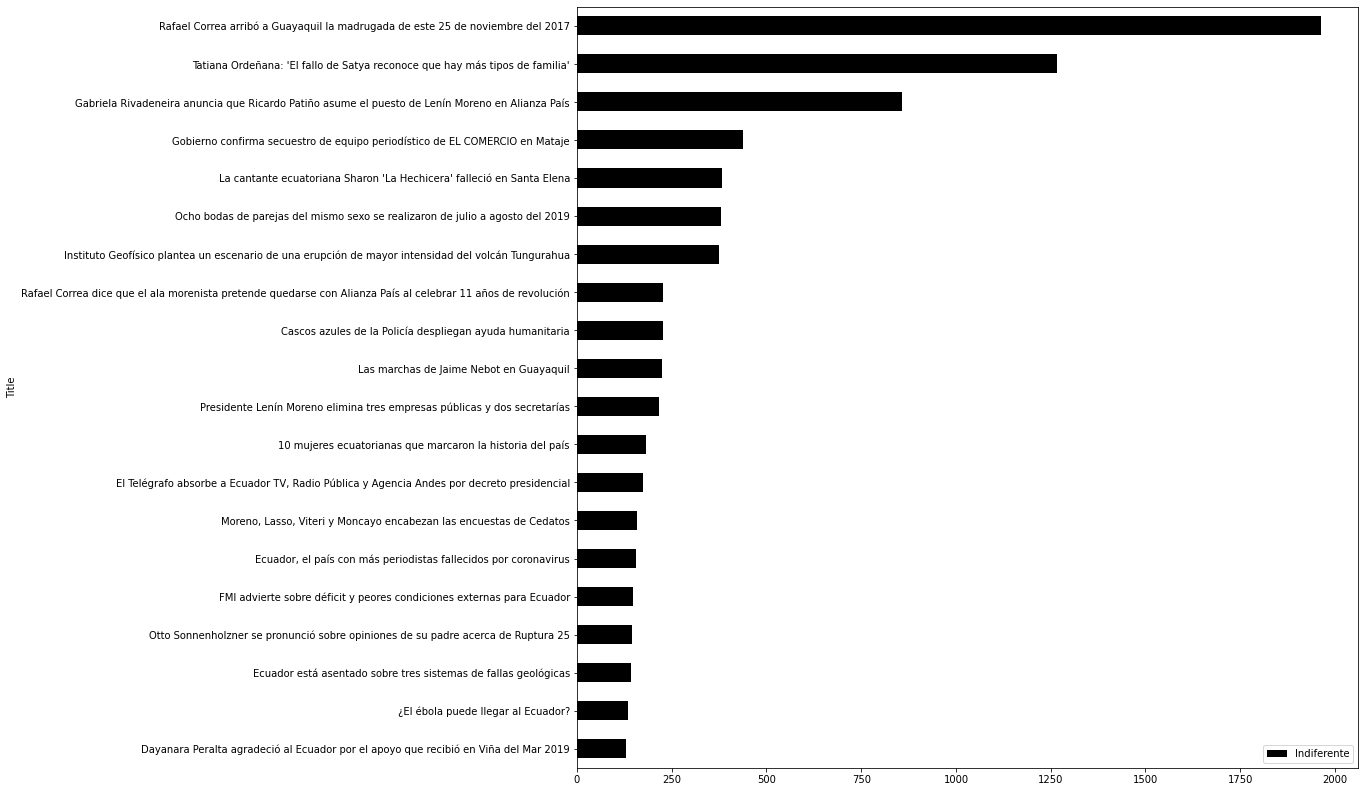

In [51]:
df_top_contento = df.sort_values('Indiferente').tail(20)

df_top_contento = df_top_contento[['Title','Indiferente']]

df_top_contento.plot(kind='barh', x='Title', y='Indiferente', color='black', figsize=(14, 14))

## Top de noticias con reacciones Indignado

<AxesSubplot:ylabel='Title'>

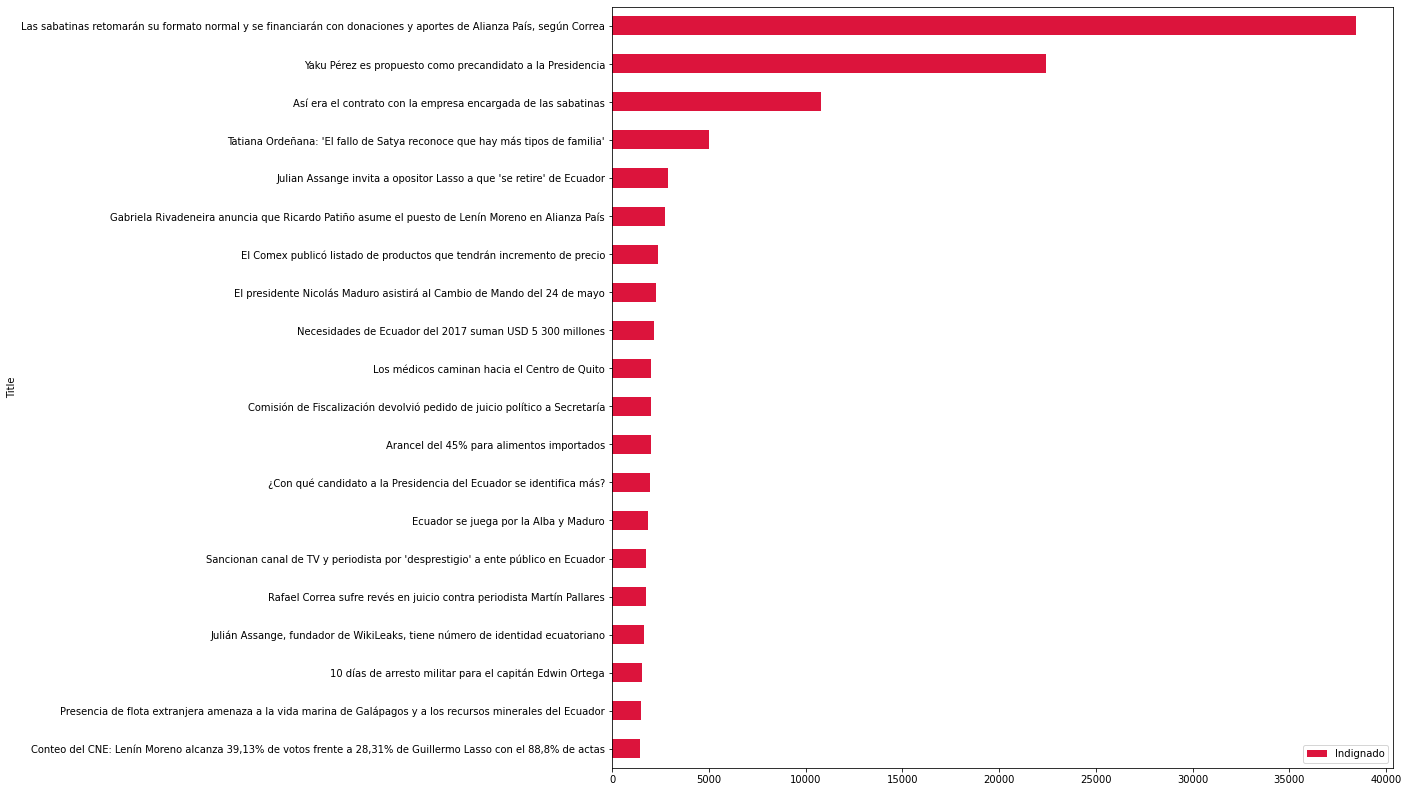

In [52]:
df_top_contento = df.sort_values('Indignado').tail(20)

df_top_contento = df_top_contento[['Title','Indignado']]

df_top_contento.plot(kind='barh', x='Title', y='Indignado', color='crimson', figsize=(14, 14))

## Top de noticias con reacciones Triste

<AxesSubplot:ylabel='Title'>

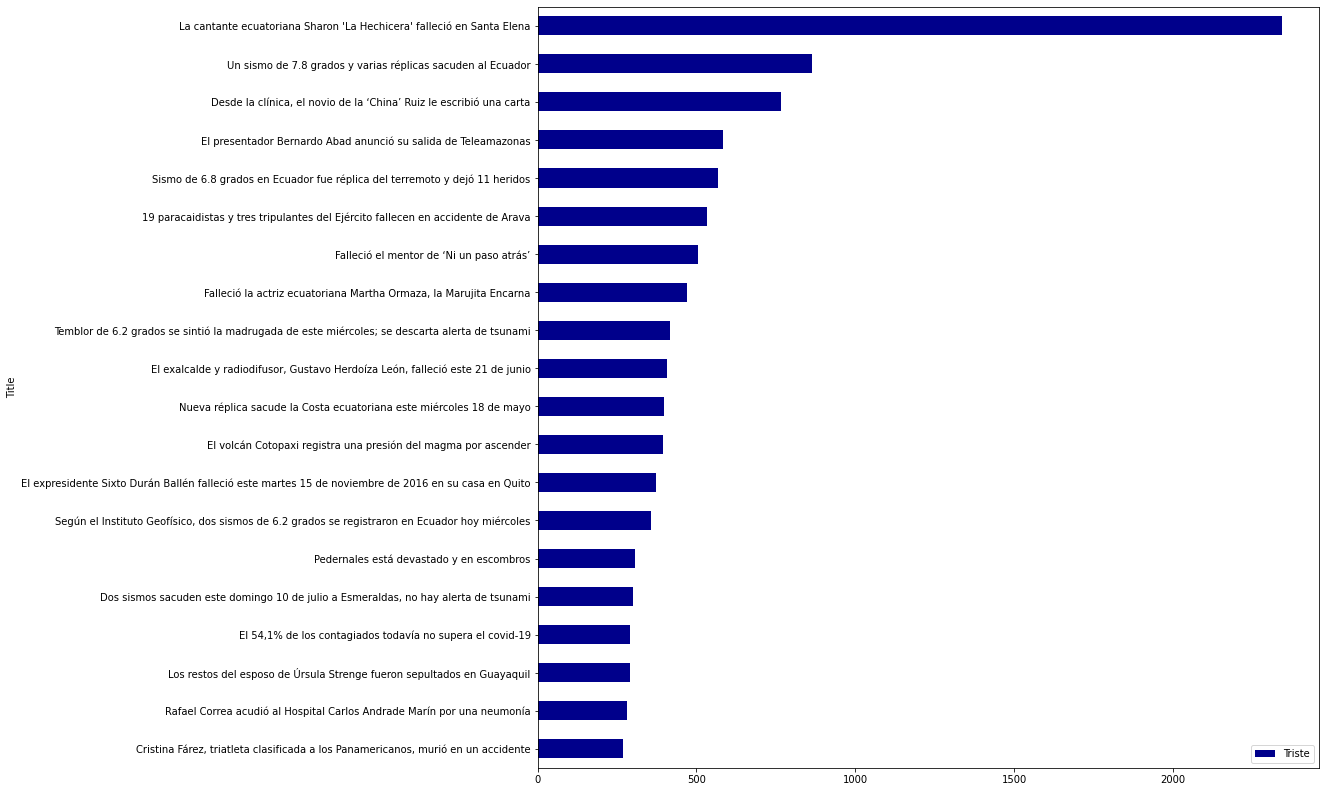

In [53]:
df_top_contento = df.sort_values('Triste').tail(20)

df_top_contento = df_top_contento[['Title','Triste']]

df_top_contento.plot(kind='barh', x='Title', y='Triste', color='darkblue', figsize=(14, 14))